In [36]:
# import libraries
import numpy as np
import torch
import torch.nn as nn
import copy

import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

C:\Users\DOANTR~1\AppData\Local\Temp/ipykernel_4644/1009634590.py:9: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


In [37]:
# Create a model
net = nn.Sequential(
    nn.Linear(2, 8),
    nn.Linear(8, 1),
    nn.Linear(1, 1)
)

# Create the four networks

In [38]:
### RANDOM SEED 1a

# create a "template" network
net_rs1a = copy.deepcopy( net )

# set the seed to 1
torch.manual_seed(1)

# update the weights
for p in net_rs1a.named_parameters():
  if 'weight' in p[0]:
    nn.init.xavier_normal_(p[1].data)

In [39]:
### RANDOM SEED 2

# create a "template" network
net_rs2 = copy.deepcopy( net )

# set the seed to 2
torch.manual_seed(2)

# update the weights
for p in net_rs2.named_parameters():
  if 'weight' in p[0]:
    nn.init.xavier_normal_(p[1].data)

In [40]:
## NO RANDOMSEED
# Create a "template" network
net_no_seed = copy.deepcopy(net)

# Update the weights
for p in net_no_seed.named_parameters():
    if ('weight' in p[0]):
        nn.init.xavier_normal_(p[1].data)

## RANDOM SEED 1a
# Create a "template" network
net_rs1a = copy.deepcopy(net)

# Set the seed to 1
torch.manual_seed(1)

# Update the weights
for p in net_rs1a.named_parameters():
    if ('weight' in p[0]):
        nn.init.xavier_normal_(p[1].data)

## RANDOM SEED 2
# Create a "template" network
net_rs2 = copy.deepcopy(net)

# Set the seed to 1
torch.manual_seed(2)

# Update the weights
for p in net_rs2.named_parameters():
    if ('weight' in p[0]):
        nn.init.xavier_normal_(p[1].data)

## RANDOM SEED 1b
# Create a "template" network
net_rs1b = copy.deepcopy(net)

# Set the seed to 1
torch.manual_seed(1)

# Update the weights
for p in net_rs1b.named_parameters():
    if ('weight' in p[0]):
        nn.init.xavier_normal_(p[1].data)

# Extract all weights from all networks

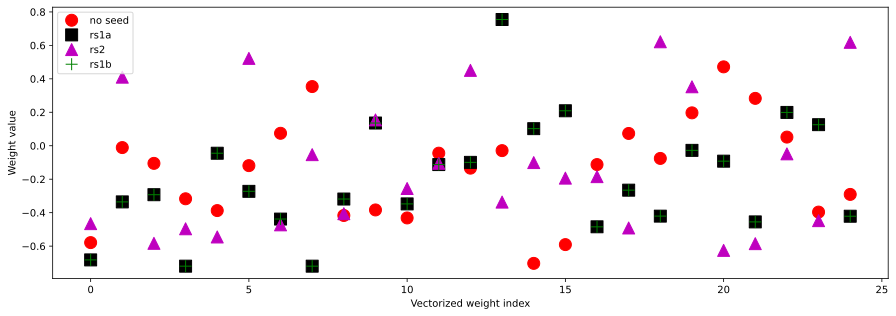

In [41]:
# Initialize empty arrays
w_ns = np.array([])
w_1a = np.array([])
w_2  = np.array([])
w_1b = np.array([])

# Loop over layers in the models
for i in range(3):
    
    # Extract the vectorized weights matrices
    # .view(-1): Reshape a Pytorch matrix to vector
    w_ns = np.append(arr=w_ns, values=net_no_seed[i].weight.view(-1).detach().numpy())
    w_1a = np.append(arr=w_1a, values=net_rs1a[i].   weight.view(-1).detach().numpy())
    w_2  = np.append(arr=w_2 , values=net_rs2[i].    weight.view(-1).detach().numpy())
    w_1b = np.append(arr=w_1b, values=net_rs1b[i].   weight.view(-1).detach().numpy())

# Plotting
fig = plt.figure(figsize=(15, 5))

plt.plot(w_ns, 'ro', markersize=12, label='no seed')
plt.plot(w_1a, 'ks', markersize=12, label='rs1a')
plt.plot(w_2, ' m^', markersize=12, label='rs2')
plt.plot(w_1b, 'g+', markersize=12, label='rs1b')
plt.legend()
plt.xlabel('Vectorized weight index')
plt.ylabel('Weight value')

plt.show()

In [42]:
# the algebraic test

print('1a-1b should be zeros:')
print( w_1a-w_1b )
print('\n\n')

print('1a-2 should be non-zeros:')
print( w_1a-w_2 )
print('\n\n')

print('1a-ns should be non-zeros:')
print( w_1a-w_ns )
print('\n\n')

1a-1b should be zeros:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]



1a-2 should be non-zeros:
[-0.21680683 -0.74543169  0.29078251 -0.22352022  0.50025801 -0.79460078
  0.03471264 -0.66646316  0.08751756 -0.01855947 -0.09211725 -0.0073103
 -0.55001713  1.09119886  0.20277754  0.40263602 -0.29967313  0.22609788
 -1.04223195 -0.37989978  0.53314489  0.12994796  0.2475912   0.57373706
 -1.03930008]



1a-ns should be non-zeros:
[-0.10338926 -0.32464096 -0.18721308 -0.40283898  0.34263621 -0.15364421
 -0.51264869 -1.0733996   0.0983139   0.51947729  0.08381623 -0.06811497
  0.03447792  0.78355764  0.80517881  0.79993533 -0.37200112 -0.33892946
 -0.34485837 -0.22414525 -0.56373987 -0.73840711  0.14737046  0.52252808
 -0.13039792]





# Additional explorations

In [43]:
# 1) The code here only fixed the *weights*, not the biases. Does that mean that net_rs1a and net_rs1b are actually
#    DIFFERENT networks??
# 
# 2) Change the code to plot/subtract the biases instead of the weights. Are the results what you expected? If not,
#    figure out why!
# 